# Respondents with multiple positions

We noticed that there are some respondents who have several positions at the same time.
It might be worth looking into to understand if there is a regional bias and a deeper reason to this.
This might also simplify some of the analysis as we are unsure how to count these answers.

Related to [Issue 19](https://github.com/GloBIAS-BioimageAnalysts/Survey_2024/issues/19).

In [1]:
# read in data
import pandas
import utils

df = pandas.read_csv('../data/survey2024_headerscleaned.csv')

Let's take a quick look at all the possible replies.

In [2]:
possible_answers = df['Which of these describe your position Choose all options that apply'].unique()
print(possible_answers)

['staff scientist in a core facility' 'PhD student' 'professor'
 'postdoctoral researcher' 'PhD student, postdoctoral researcher'
 'PhD student, staff scientist researcher, staff scientist in a core facility'
 'staff scientist researcher'
 'staff scientist researcher, staff scientist in a core facility, professor'
 'staff scientist researcher,' 'core facility head'
 'postdoctoral researcher, staff scientist researcher'
 'junior group leader' 'core facility head, junior group leader'
 'staff scientist researcher, staff scientist in a core facility'
 'MSc student' 'research engineer' 'staff engineer in a core facility'
 'Research Engineer'
 'staff scientist in a core facility, Research Software Engineer (with a strong interest in image analysis)'
 'postdoctoral researcher, staff scientist in a core facility'
 'staff scientist in a core facility, core facility head'
 'PhD student, staff scientist in a core facility'
 'PhD student, Clinical data scientist'
 'Director of Data, AI and Analys

In [3]:
df = df.dropna(subset=["Which of these describe your position Choose all options that apply"])
df["positions"] = df["Which of these describe your position Choose all options that apply"].apply(lambda x: set(filter(None, x.lower().replace(', ', ',').split(','))))
df["number_of_positions"] = df["positions"].apply(len)

In [4]:
df["number_of_positions"].value_counts().sort_index()

number_of_positions
1    244
2     40
3      6
Name: count, dtype: int64

There are 6 people with three different positions.
Let's take a closer look into this.

In [5]:
print(df.query("number_of_positions == 3")["positions"].values)

[{'phd student', 'staff scientist researcher', 'staff scientist in a core facility'}
 {'staff scientist researcher', 'professor', 'staff scientist in a core facility'}
 {'junior group leader', 'staff scientist researcher', 'associate professor'}
 {'core facility head', 'staff scientist researcher', 'staff scientist in a core facility'}
 {'junior group leader', 'staff scientist researcher', 'staff scientist in a core facility'}
 {'staff scientist researcher', 'postdoctoral researcher', 'staff scientist in a core facility'}]


All of them have `staff scientist researcher` and `staff scientist in a core facility`.

Each of them have a different third position such as:
- `PhD student`
- `postdoctoral researcher`
- `junior group leader`
- `junior group leader`and `Associate Professor`
- `core facility head`
- `professor`


<Axes: xlabel='positions'>

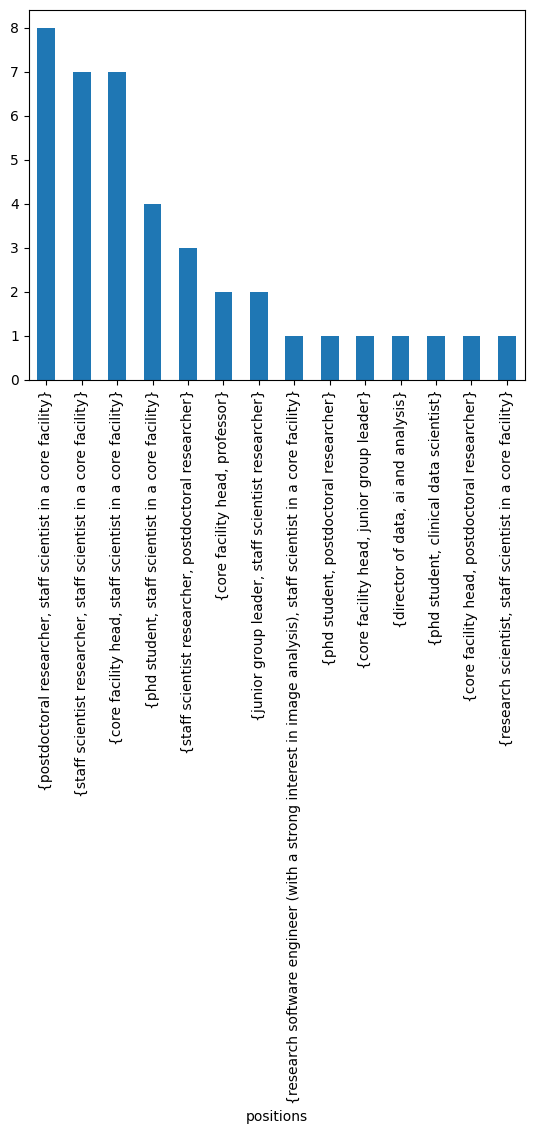

In [6]:
df.query("number_of_positions == 2")["positions"].value_counts().plot(kind='bar')

In [7]:
df.query("number_of_positions == 2")["positions"].values

array([{'phd student', 'postdoctoral researcher'},
       {'staff scientist researcher', 'postdoctoral researcher'},
       {'core facility head', 'junior group leader'},
       {'staff scientist researcher', 'staff scientist in a core facility'},
       {'research software engineer (with a strong interest in image analysis)', 'staff scientist in a core facility'},
       {'staff scientist researcher', 'postdoctoral researcher'},
       {'postdoctoral researcher', 'staff scientist in a core facility'},
       {'staff scientist researcher', 'staff scientist in a core facility'},
       {'core facility head', 'staff scientist in a core facility'},
       {'core facility head', 'staff scientist in a core facility'},
       {'core facility head', 'staff scientist in a core facility'},
       {'phd student', 'staff scientist in a core facility'},
       {'phd student', 'clinical data scientist'},
       {'phd student', 'staff scientist in a core facility'},
       {'postdoctoral researcher'